This notebook aims at comparing easywave reference point locations

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
def ew2py(fileName):
    """
        Reads EasyWave binary output into numpy arrays. 
        Works for .ssh and .sshmax files (at least).
        
        Example usage:

        lon, lat, h = ew2py(fileName)    
        plt.pcolormesh(lon,lat,h)
    """
    import struct
    from numpy import zeros, linspace

    f = open(fileName, 'rb')
    dsbb = f.read(4)

    nOutI = struct.unpack('h',f.read(2))[0]
    nOutJ = struct.unpack('h',f.read(2))[0]
    
    lonOutMin = struct.unpack('d',f.read(8))[0]
    lonOutMax = struct.unpack('d',f.read(8))[0]
    latOutMin = struct.unpack('d',f.read(8))[0]
    latOutMax = struct.unpack('d',f.read(8))[0]
    
    tmp = f.read(8)
    tmp = f.read(8)

    lon = linspace(lonOutMin,lonOutMax,nOutI)
    lat = linspace(latOutMin,latOutMax,nOutJ)
    values = zeros((nOutJ,nOutI))

    for j in range(nOutJ):
        for i in range(nOutI):
            value = f.read(4)
            value = struct.unpack('f',value)[0]
            values[j,i] = value
    return lon, lat, values

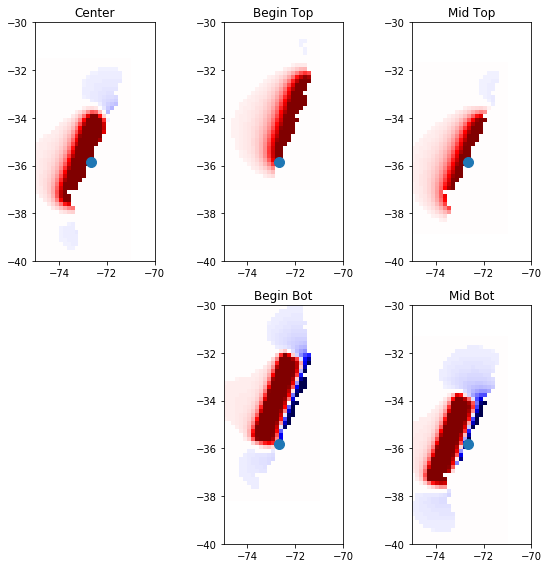

In [122]:
fig = plt.figure(figsize=(8,8))
xmin = -75
xmax = -70
ymin = -40
ymax = -30
vmin = -2
vmax = 2
fileName = '../easyWave_begintop/eWave.2D.{0:05d}.ssh'.format(0) 
lon, lat, h0 = ew2py(fileName)
ax = plt.subplot(232)
p = ax.pcolormesh(lon,lat,h0[:-1,:-1],cmap=plt.cm.seismic,vmin=vmin,vmax=vmax)
ax.scatter(-72.668,-35.826,s=100)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.set_aspect(1)
ax.set_title('Begin Top')


fileName = '../easyWave_midtop/eWave.2D.{0:05d}.ssh'.format(0) 
lon, lat, h0 = ew2py(fileName)
ax = plt.subplot(233)
p = ax.pcolormesh(lon,lat,h0[:-1,:-1],cmap=plt.cm.seismic,vmin=vmin,vmax=vmax)
ax.scatter(-72.668,-35.826,s=100)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.set_aspect(1)
ax.set_title('Mid Top')

fileName = '../easyWave_beginbot//eWave.2D.{0:05d}.ssh'.format(0) 
lon, lat, h0 = ew2py(fileName)
ax = plt.subplot(235)
p = ax.pcolormesh(lon,lat,h0[:-1,:-1],cmap=plt.cm.seismic,vmin=vmin,vmax=vmax)
ax.scatter(-72.668,-35.826,s=100)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.set_aspect(1)
ax.set_title('Begin Bot')

fileName = '../easyWave_midbot//eWave.2D.{0:05d}.ssh'.format(0) 
lon, lat, h0 = ew2py(fileName)
ax = plt.subplot(236)
p = ax.pcolormesh(lon,lat,h0[:-1,:-1],cmap=plt.cm.seismic,vmin=vmin,vmax=vmax)
ax.scatter(-72.668,-35.826,s=100)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.set_aspect(1)
ax.set_title('Mid Bot')


fileName = '../easyWave_center//eWave.2D.{0:05d}.ssh'.format(0) 
lon, lat, h0 = ew2py(fileName)
ax = plt.subplot(231)
p = ax.pcolormesh(lon,lat,h0[:-1,:-1],cmap=plt.cm.seismic,vmin=vmin,vmax=vmax)
ax.scatter(-72.668,-35.826,s=100)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.set_aspect(1)
ax.set_title('Center')


plt.tight_layout()

Conclusion:
* Top/bottom edges refer to "close to the surface. That is why they look at the "left" or "right" on these plots
* In my (physical) notebook wrote notes on formulas for obtainin okada's coordinates from northing,eastings of the stereo projection

In [133]:
fileName = '../easyWave_midtop/eWave.2D.{0:05d}.ssh'.format(0) 
lon, lat, h0 = ew2py(fileName)
np.savetxt('../data/easyWave_midtop_initialcondition',h0)

In [135]:
tlab = np.loadtxt('../tsunamilab/tlab2D_easywave',skiprows=1,delimiter=',').reshape((361,361))

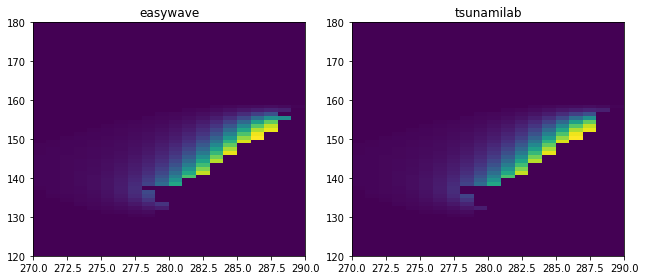

In [163]:
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.pcolormesh(h0,vmax=5.0,vmin=0.0)
plt.xlim(270,290)
plt.ylim(120,180)
plt.title('easywave')

plt.subplot(122)
plt.pcolormesh(tlab,vmax=5.0,vmin=0.0)
plt.xlim(270,290)
plt.ylim(120,180)
plt.title('tsunamilab')
plt.tight_layout()

(120, 180)

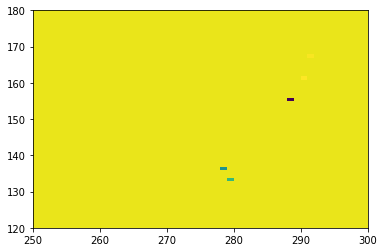

In [146]:
plt.pcolormesh(tlab-h0)
plt.xlim(250,300)
plt.ylim(120,180)

In [147]:
np.abs(tlab-h0).max()

2.3991634845733643